In [5]:
#Step 1 Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [6]:
# Step 2 Upload the Excel file (students pick from local drive)
uploaded = files.upload()  # choose your .xlsx
file_name = list(uploaded.keys())[0]

# Step 3 Read the sheet with replicates (Sheet1)
# If your sheet name differs, change 'Sheet1' or use sheet index (e.g., sheet_name=1)
df = pd.read_excel(file_name, sheet_name='Sheet1')

Saving Alpha synuclein Log transformed.xlsx to Alpha synuclein Log transformed.xlsx


In [7]:
#  Step 4: Show the first few rows
print(df.head())

  Gene ID   WT_D1_1   WT_D1_2   WT_D10_1   WT_D10_2   WT_D30_1   WT_D30_2  \
0     NaN -1.144903       NaN        NaN        NaN  -0.646406  -1.390510   
1     dnc -1.258322 -1.648779  -1.381122  -2.117787  -2.122366  -2.448194   
2     NaN       NaN       NaN  -0.444125  -1.867121        NaN  -0.189960   
3    Marf -0.954641 -1.284686  -1.517296  -2.158816  -0.537613  -0.992833   
4     Rh4       NaN -0.369930        NaN        NaN        NaN  -3.020692   

   A30P_D1_1  A30P_D1_2   A30P_D10_1   A30P_D10_2  A53T_D1_1  A53T_D1_2  \
0  -0.630707  -1.048800    -1.363457    -1.449612  -0.991943        NaN   
1  -1.834030  -2.350706    -1.820311    -2.124629  -1.187871        NaN   
2  -1.984845        NaN    -2.193833    -1.280685  -1.456999        NaN   
3  -1.037977  -1.583549    -1.725899    -2.042992  -0.804048  -1.256528   
4   0.648926  -1.958981    -3.534981     0.174406        NaN        NaN   

   A53T_D10_1   A53T_D10_2  A53T_D30_1  A53T_D30_2  
0   -1.464066    -1.939095       

In [8]:
# Step 5 Tidy to long format and compute mean ± SEM per strain & time ===
gene_id_col = df.columns[0]                       # first column (e.g., 'Gene ID')
value_cols = df.columns[1:]                    # replicate columns

long_df = df.melt(id_vars=[gene_id_col],
                  value_vars=value_cols,
                  var_name='StrainRep',
                  value_name='Log_Expression')

# Extract Strain and Day from StrainRep
# Example: 'WT_D1_1' -> Strain='WT', Day='D1'
# The regex (?:\a+) makes the replicate number non-capturing group.
# This ensures that only Strain and Day are captured.
long_df[['Strain', 'Day']] = long_df['StrainRep'].str.extract(r'([A-Za-z0-9]+)_(D\d+)_\d+')

# Convert Day to a numerical type for plotting (e.g., D1 -> 1, D10 -> 10, D30 -> 30)
long_df['Day_numeric'] = long_df['Day'].str.replace('D', '').astype(int)

# Calculate mean and SEM across all genes for each Strain and Day
summary = (long_df
           .groupby(['Strain', 'Day_numeric'], as_index=False)
           .agg(mean_log_expression=('Log_Expression', 'mean'),
                sem_log_expression=('Log_Expression', lambda x: x.std(ddof=1) / np.sqrt(len(x)))))

print("Summary overall per Strain, Day (first rows):\n", summary.head(), "\n")

Summary overall per Strain, Day (first rows):
   Strain  Day_numeric  mean_log_expression  sem_log_expression
0   A30P            1            -0.502066            0.012766
1   A30P           10            -0.267042            0.010768
2   A53T            1            -0.508442            0.012519
3   A53T           10            -0.260044            0.010785
4   A53T           30            -0.305563            0.011675 



Plot saved as 'alpha_synuclein_expression_plot1.pdf'


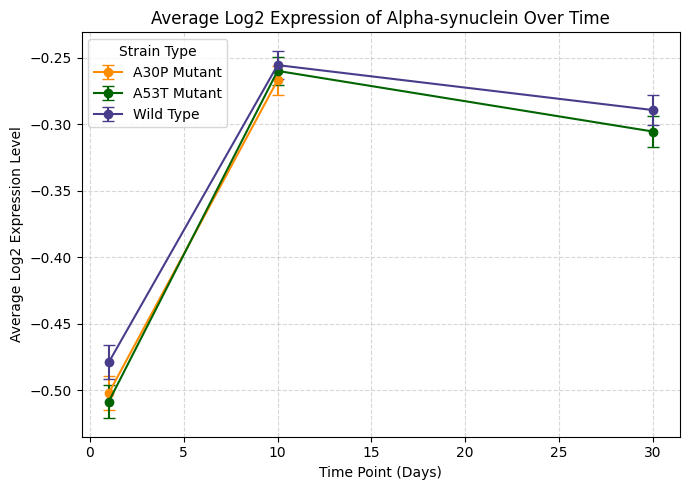

In [19]:
import matplotlib.pyplot as plt

# === 4) Plot mean curves with SEM error bars ===
plt.figure(figsize=(7,5))

# Define colors for each strain - customize as needed
color_map = {
    'WT': 'DarkSlateBlue',
    'A30P': 'DarkOrange',
    'A53T': 'DarkGreen'
    # Add other strains if they appear in your data
}

# Define display names for strains, matching plot 2
strain_display_names = {
    'WT': 'Wild Type',
    'A30P': 'A30P Mutant',
    'A53T': 'A53T Mutant'
}

for strain, sub in summary.groupby('Strain'):
    sub = sub.sort_values('Day_numeric') # Ensure days are in order for line plot
    x = sub['Day_numeric'].values
    y = sub['mean_log_expression'].values
    e = sub['sem_log_expression'].values

    # Pick color (default gray if strain not in color_map)
    color = color_map.get(strain, 'gray')

    # Get display name for the strain
    display_label = strain_display_names.get(strain, strain)

    # Plot line + markers with error bars
    plt.errorbar(x, y,
                 yerr=e,
                 fmt='-o', # Line with circle markers
                 capsize=4,
                 color=color,
                 label=display_label) # Use display_label for legend

plt.xlabel("Time Point (Days)")
plt.ylabel("Average Log2 Expression Level")
plt.title("Average Log2 Expression of Alpha-synuclein Over Time")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Strain Type")
plt.tight_layout()

# Save the figure before showing it
plt.savefig('alpha_synuclein_expression_plot1.pdf')
print("Plot saved as 'alpha_synuclein_expression_plot1.pdf'")

plt.show()

In [16]:
import matplotlib.pyplot as plt

# Save the current figure to a PDF file
plt.savefig('alpha_synuclein_expression.pdf')

print("Plot saved as 'alpha_synuclein_expression.pdf'")

Plot saved as 'alpha_synuclein_expression.pdf'


<Figure size 640x480 with 0 Axes>

Plot saved as 'alpha_synuclein_expression.pdf'


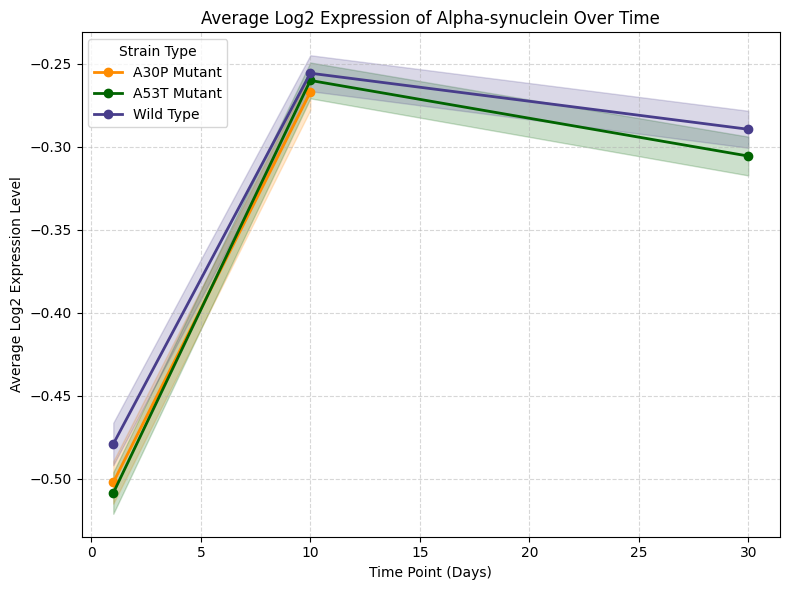

In [17]:
# === Step 6: Plot mean curves with SEM shading and custom colors ===
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6)) # Slightly larger figure for better readability

# Define colors for each strain - customize as needed
color_map = {
    'WT': 'DarkSlateBlue',
    'A30P': 'DarkOrange',
    'A53T': 'DarkGreen'
    # Add other strains if they appear in your data
}

# Define display names for strains
strain_display_names = {
    'WT': 'Wild Type',
    'A30P': 'A30P Mutant',
    'A53T': 'A53T Mutant'
}

for strain, sub in summary.groupby('Strain'):
    sub = sub.sort_values('Day_numeric') # Ensure days are in order for line plot
    x = sub['Day_numeric'].values
    y = sub['mean_log_expression'].values
    e = sub['sem_log_expression'].values

    # Pick color (default gray if strain not in color_map)
    color = color_map.get(strain, 'gray')

    # Get display name for the strain
    display_label = strain_display_names.get(strain, strain)

    # Plot line + markers
    plt.plot(x, y, marker='o', label=display_label, color=color, linewidth=2)

    # SEM shading
    plt.fill_between(x, y - e, y + e, alpha=0.2, color=color)

plt.xlabel("Time Point (Days)")
plt.ylabel("Average Log2 Expression Level")
plt.title("Average Log2 Expression of Alpha-synuclein Over Time")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Strain Type")
plt.tight_layout()

# Save the figure before showing it
plt.savefig('alpha_synuclein_expression.pdf')
print("Plot saved as 'alpha_synuclein_expression.pdf'")

plt.show()